In [25]:
import requests
import pandas as pd
headers = {
    'user-agent': 'my-app'
}


def main(url):
    with requests.Session() as req:
        req.headers.update(headers)
        allin = []
        for t in ['AMZN', 'GS']:
            params = {
                't': t
            }
            r = req.get(url, params=params)
            df = pd.read_html(r.content, attrs={'id': 'news-table'})[0]
            df[2] = t
            allin.append(df)
        df = pd.concat(allin, ignore_index=True)
        #print(df[2])
        df.to_csv('data.csv', index=False)

main('https://finviz.com/quote.ashx')

In [26]:
df = pd.read_csv('data.csv', usecols=[0,1,2], names=['date_time', 'title','ticker'])
# drop first row
data

,date_time,title,ticker
1,Jan-16-23 01:27PM,2 FAANG Stocks to Buy in 2023 and 1 to Avoid: ...,AMZN
2,12:45PM,Davos: PwC survey finds 'bleak CEO outlook' fo...,AMZN
3,11:36AM,2 Stocks to Benefit From Falling Inflation Gur...,AMZN
4,11:29AM,Big Tech Stocks Could Rebound Big Time. Heres ...,AMZN
5,10:34AM,Amazon Has a Partner for Enterprise Blockchain...,AMZN
...,...,...,...
202,10:33AM,Goldman Sachs sees less pain but also no gain ...,GS
203,09:00AM,"The Goldman Sachs Group, Inc.'s (NYSE:GS) Low ...",GS
204,07:45AM,Stack Capital Invests $8 Million USD Into Locu...,GS
205,07:40AM,Abu Dhabi's ADNOC working with Goldman Sachs o...,GS


In [18]:
data.iloc[2][0]  

'11:36AM'

In [28]:
data=data.reset_index(drop=True) 

In [29]:
data

,date_time,title,ticker
0,Jan-16-23 01:27PM,2 FAANG Stocks to Buy in 2023 and 1 to Avoid: ...,AMZN
1,12:45PM,Davos: PwC survey finds 'bleak CEO outlook' fo...,AMZN
2,11:36AM,2 Stocks to Benefit From Falling Inflation Gur...,AMZN
3,11:29AM,Big Tech Stocks Could Rebound Big Time. Heres ...,AMZN
4,10:34AM,Amazon Has a Partner for Enterprise Blockchain...,AMZN
...,...,...,...
201,10:33AM,Goldman Sachs sees less pain but also no gain ...,GS
202,09:00AM,"The Goldman Sachs Group, Inc.'s (NYSE:GS) Low ...",GS
203,07:45AM,Stack Capital Invests $8 Million USD Into Locu...,GS
204,07:40AM,Abu Dhabi's ADNOC working with Goldman Sachs o...,GS


In [71]:
parsed_data = []
for i, row in data.iterrows():
    title = data['title'].iloc[i]
    ticker = data['ticker'].iloc[i]
    date_data = data.iloc[i][0].split(' ')
    if len(date_data) == 1:
        time = date_data[0] 
    else:
        date = date_data[0]
        time = date_data[1]
        
    parsed_data.append([time, title, date, ticker])

clean_df = pd.DataFrame(parsed_data, columns=['time', 'ticker', 'date', 'title'])

In [72]:
clean_df

,time,ticker,date,title
0,01:27PM,AMZN,Nov-28-22,2 FAANG Stocks to Buy in 2023 and 1 to Avoid: ...
1,12:45PM,AMZN,Nov-28-22,Davos: PwC survey finds 'bleak CEO outlook' fo...
2,11:36AM,AMZN,Nov-28-22,2 Stocks to Benefit From Falling Inflation Gur...
3,11:29AM,AMZN,Nov-28-22,Big Tech Stocks Could Rebound Big Time. Heres ...
4,10:34AM,AMZN,Nov-28-22,Amazon Has a Partner for Enterprise Blockchain...
...,...,...,...,...
201,10:33AM,GS,Nov-28-22,Goldman Sachs sees less pain but also no gain ...
202,09:00AM,GS,Nov-28-22,"The Goldman Sachs Group, Inc.'s (NYSE:GS) Low ..."
203,07:45AM,GS,Nov-28-22,Stack Capital Invests $8 Million USD Into Locu...
204,07:40AM,GS,Nov-28-22,Abu Dhabi's ADNOC working with Goldman Sachs o...


In [73]:
clean_df.to_csv('clean_data.csv', index=False)
data=clean_df

In [74]:
# """apply sentiment analysis"""
from nltk.sentiment.vader import SentimentIntensityAnalyzer

vader = SentimentIntensityAnalyzer()

f = lambda title: vader.polarity_scores(title)['compound']
data['compound'] = data['title'].apply(f)
data['date'] = pd.to_datetime(data['date'])


In [75]:
data

,time,ticker,date,title,compound
0,01:27PM,AMZN,2022-11-28,2 FAANG Stocks to Buy in 2023 and 1 to Avoid: ...,-0.6249
1,12:45PM,AMZN,2022-11-28,Davos: PwC survey finds 'bleak CEO outlook' fo...,0.0000
2,11:36AM,AMZN,2022-11-28,2 Stocks to Benefit From Falling Inflation Gur...,0.3400
3,11:29AM,AMZN,2022-11-28,Big Tech Stocks Could Rebound Big Time. Heres ...,0.0000
4,10:34AM,AMZN,2022-11-28,Amazon Has a Partner for Enterprise Blockchain...,0.1779
...,...,...,...,...,...
201,10:33AM,GS,2022-11-28,Goldman Sachs sees less pain but also no gain ...,0.2014
202,09:00AM,GS,2022-11-28,"The Goldman Sachs Group, Inc.'s (NYSE:GS) Low ...",-0.0258
203,07:45AM,GS,2022-11-28,Stack Capital Invests $8 Million USD Into Locu...,0.0000
204,07:40AM,GS,2022-11-28,Abu Dhabi's ADNOC working with Goldman Sachs o...,0.0000


In [76]:
data['compound'].iloc[5]

0.0

<Figure size 10000x8000 with 0 Axes>

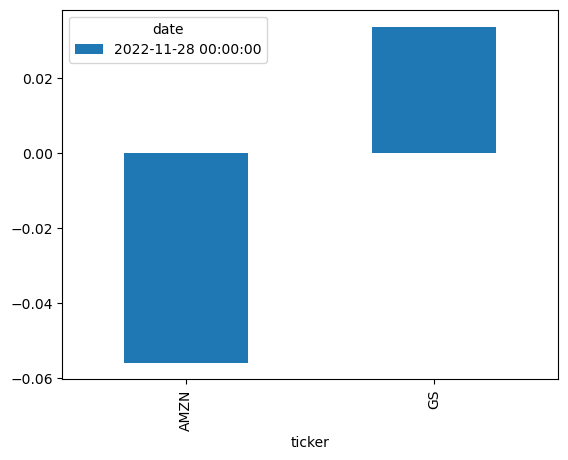

In [77]:
import matplotlib.pyplot as plt
plt.figure(figsize=(100,80))
mean_df = data.groupby(['ticker', 'date']).mean().unstack()
mean_df = mean_df.xs('compound', axis="columns")
mean_df.plot(kind='bar')
plt.show()